In [1]:
from hlm_basic.hlm_models import dam_q, dam_q_varParam
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import math
import seaborn as sns 

In [6]:
def plot_QSv(h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest, state=1, area=None, axes=None, save=None):
    rcParams.update({'font.size': 13,'axes.labelweight':'bold','axes.labelsize':14,\
                                'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                                'lines.linewidth':2.5})
    dam_params = ['pass',h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest]
    storage = np.arange(0, s_max+50000, 100)
    height = [h_max * pow(ss / s_max, alpha) for ss in storage]
    discharge = [dam_q(hh, state, dam_params) for hh in height]
    
    ## Plot height-storage relationship
    if axes is not None:
        ax1 = axes[0]
        ax2 = axes[1]
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
        ax1 = ax[0]
        ax2 = ax[1]
    ax1.plot(storage, height, c ='k')
    ax1.axvline(x=s_max, c='r', linewidth=2)
    ax1.set(xlabel='Storage [10$^3$ m$^{3}$]',ylabel ='Height [m]',)
    ax1.grid()
    ax1.set_xticks(np.arange(0, s_max+50000, 100000))
    ax1.set_xticklabels(np.arange(0, (s_max+50000)/1000, 100).astype(int))
    ## Plot discharge-storage relationship
    ax2.plot(storage, discharge, c ='k')
    ax2.axvline(x=s_max, c='r', linewidth=2)
    if area is not None:
        ax2.axhline(y=3.12*(area**(0.57)), c='cyan', linewidth=2)
    ax2.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
    ax2.grid()
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle('H$_{spill}$=%.1fm   H$_{max}$=%.1fm  S$_{max}$=%dm$^3$'r'   $\alpha$=%.1f''\n'\
                    ' OD=%.2fm   c$_1$= %.1f    c$_2$=%.2f    L$_{spill}$=%.1fm    L$_{crest}$=%.1fm'\
                    %(h_spill, h_max, s_max, alpha,diameter,c1, c2, L_spill, L_crest ), size=15, y=1.05)
    if save is not None:
        fig.savefig(save + '.png', bbox_inches = 'tight', pad_inches = 0.5)
    return ax1, ax2

(<matplotlib.axes._subplots.AxesSubplot at 0x21e8de8bf88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x21e8f568548>)

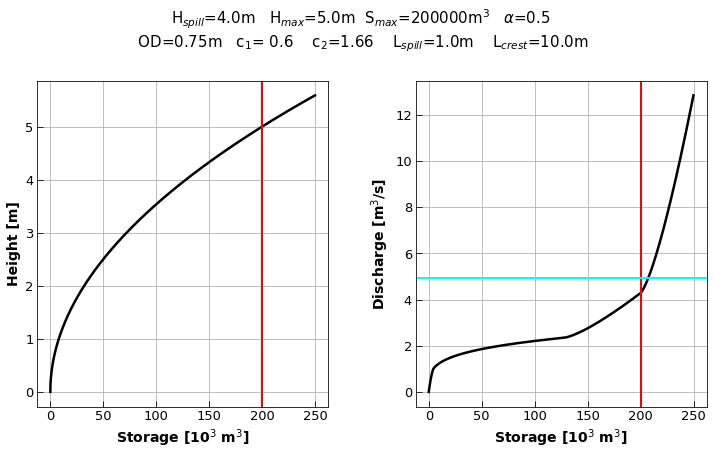

In [3]:
plot_QSv(4, 5, 200000, 0.5, 0.75, 0.6, 1.66, 1, 10, state=1, area=2.25)#, save='../../Supp_DamStudy/QvS_h4_5_O75_1_10')

(<matplotlib.axes._subplots.AxesSubplot at 0x2bb4d9bb148>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2bb4d97fa08>)

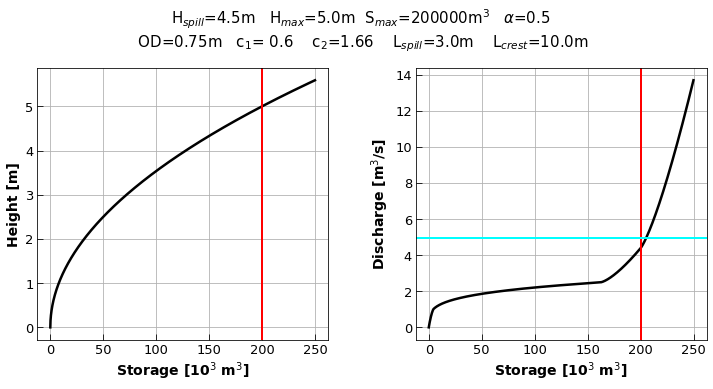

In [7]:
plot_QSv(4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 3, 10, state=1, area=2.25)#, save='../../Supp_DamStudy/QvS_h4_5_O75_1_10')


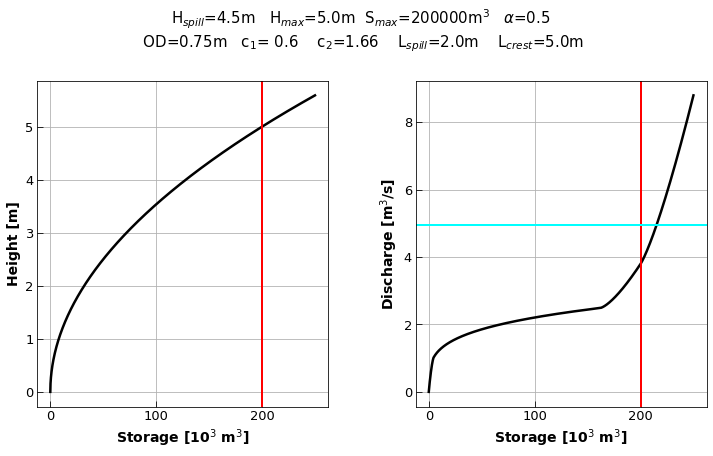

In [26]:
### USE this for order one
ax1, ax2 = plot_QSv(4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 2, 5, state=1, area=2.25)

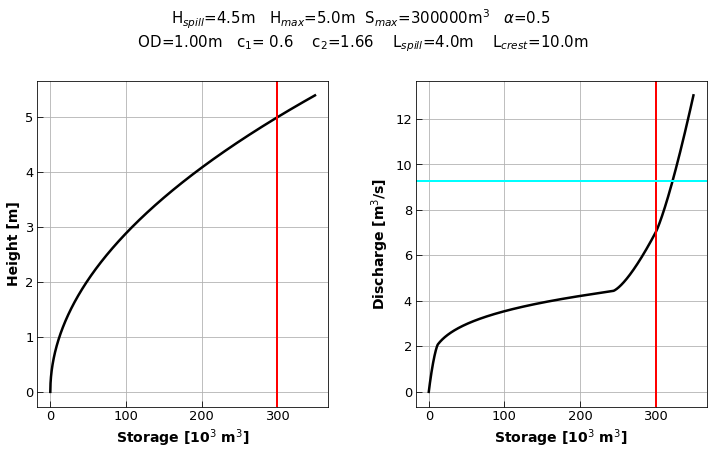

In [25]:
# USE this for order 4
ax1, ax2 = plot_QSv(4.5, 5, 300000, 0.5, 1.0, 0.6, 1.66, 4, 10, state=1, area=6.75)   